# Tank with Holes
This Demo shows a simple container with holes on the bottom. Regarding the Water In-Flow, Number of Holes and Diameter of the Holes the current water depth is calculated. On the left side you see a 2D Visualization of the problem and on the right side a 3D Visualization.

The Water depth is calculated this way:

$$ 
h = \frac{1}{2g} \cdot \left(\frac{4 \cdot Q_ {in}}{n_{holes} \cdot \pi \cdot d_{holes}^2}\right)^2 m 
$$
$g$...Gravitational Force constant (~9.81)

$Q_{in}$...In-Flow of water

$n_{holes}$...Number of Holes

$d_{holes}$...Diameter of Holes

In [1]:
import sys
sys.path.append('../')

In [2]:
from tank import Tank, Hole, create_holes
import ipywidgets as widgets
from ipycanvas import canvas
from IPython.display import display, Markdown, Latex
import time
from demo import *
from pythreejs import *

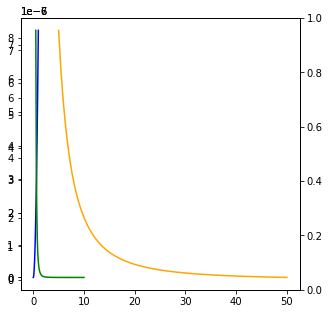

In [3]:
c = canvas.Canvas(width=350, height=250)
m = Tank(create_holes(25, 2), 0.06, c=c)
cam = PerspectiveCamera(aspect=300 / 200, children=(DirectionalLight(color='white', intensity=0.5, matrixWorldNeedsUpdate=True, position=(2.5, 5.0, 1.0), quaternion=(0.0, 0.0, 0.0, 1.0), rotation=(0.0, 0.0, 0.0, 'XYZ'), scale=(1.0, 1.0, 1.0), shadow=DirectionalLightShadow(camera=OrthographicCamera(bottom=-5.0, far=500.0, left=-5.0, near=0.5, position=(0.0, 0.0, 0.0), projectionMatrix=(0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, -0.004004004004004004, 0.0, 0.0, 0.0, -1.002002002002002, 1.0), quaternion=(0.0, 0.0, 0.0, 1.0), right=5.0, rotation=(0.0, 0.0, 0.0, 'XYZ'), scale=(1.0, 1.0, 1.0), top=5.0, up=(0.0, 1.0, 0.0)), mapSize=(512.0, 512.0)), target=Object3D(position=(0.0, 0.0, 0.0), quaternion=(0.0, 0.0, 0.0, 1.0), rotation=(0.0, 0.0, 0.0, 'XYZ'), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0)), up=(0.0, 1.0, 0.0)),), position=(-1.9329448761077836, 0.2499403368586175, -1.2680579674595862), projectionMatrix=(0.7148356401698529, 0.0, 0.0, 0.0, 0.0, 2.1445069205095586, 0.0, 0.0, 0.0, 0.0, -1.00010000500025, -1.0, 0.0, 0.0, -0.200010000500025, 0.0), quaternion=(0.07811175932294602, 0.8971084085692673, 0.17628085997520093, -0.3975174395371784), rotation=(2.955719827270785, -0.569237255703572, 3.0405841287461377, 'XYZ'), scale=(1.0, 1.0, 1.0), up=(0.0, 1.0, 0.0))
scene = Scene(children=[m.tank_pivot, m.water_pivot, cam, AmbientLight(color='#FFFFFF')], background=None)
m.set_threejs_scene(scene)
m.draw_holes3D(scene)

renderer = Renderer(camera=cam,
                    scene=scene,
                    alpha=True,
                    clearOpacity=0.3,
                    clearColor='gray',
                    width=300, height=200)

demo = Demo(m.params, m, drawable=widgets.HBox([c, renderer]))
m.plot.canvas()

In [4]:
demo.show()

Output()

In [5]:
faucetbox = BoxBufferGeometry(1, 1, 1)
faucetbox_mesh = Mesh(faucetbox, material=MeshPhongMaterial(color='gray'), position=[0, 0.5, 1])

faucetpipe = BoxBufferGeometry(0.5, 0.25, 0.75)
faucetpipe_mesh = Mesh(faucetpipe, material=MeshPhongMaterial(color='black'), position=[0, 0.25, 0])

stream = CylinderBufferGeometry(0.1, 0.1, 1.75, 16, 8)
stream_mesh = Mesh(stream, material=MeshPhongMaterial(color='lightblue'), position=[0, 0, -0.25])

In [6]:
scene.add(faucetbox_mesh)
scene.add(faucetpipe_mesh)
scene.add(stream_mesh)

In [8]:
m.plot.set_visible(2)

In [9]:
m.plot.canvas()